In [2]:

!pip install neuronunit
import pickle
import numpy as np
from neuronunit.tests.dynamics import CVTest, LocalVariationTest
!pip install pyspike 
from elephant.statistics import mean_firing_rate, cv, isi
from elephant.conversion import BinnedSpikeTrain#, corrcoef
import pyspike
import matplotlib as mpl
import matplotlib.pyplot as plt

import pyspike as spk
import pickle
import numpy as np
with open('membrane_dynamics_balanced_file.p', 'rb') as f:
  #with open('pickles/membrane_dynamics_file.p', 'rb') as f:
  mdf1 = pickle.load(f)
  
  
with open('pickles/membrane_dynamics_hippocampome_file.p', 'rb') as f:
  mdf2 = pickle.load(f)
  print(mdf2)

from neuronunit import tests as nu_tests, neuroelectro
from neuronunit.tests import passive, waveform, fi
cholinergic = {'neuron':'115'}
import neuronunit


ass = mdf1.analogsignals[0]   
vm_spiking = []
spike_trains = []

for spiketrain in mdf1.spiketrains:
    vm_spiking.append(mdf1.analogsignals[0][spiketrain.annotations['source_id']])
    #spiketrain = mdf1.spiketrains[index]
    y = np.ones_like(spiketrain) * spiketrain.annotations['source_id']
    
    # argument edges is the time interval you want to be considered.
    pspikes = pyspike.SpikeTrain(spiketrain,edges=(0,len(ass)))
    spike_trains.append(pspikes)


  Running setup.py bdist_wheel for neuronunit: started
  Running setup.py bdist_wheel for neuronunit: finished with status 'done'
  Stored in directory: C:\Users\Kelly\AppData\Local\pip\Cache\wheels\f8\e3\31\ff8f0c6797e342924436972aa5a1fa1483238e911309eddfc7
  Running setup.py bdist_wheel for sciunit: started
  Running setup.py bdist_wheel for sciunit: finished with status 'done'
  Stored in directory: C:\Users\Kelly\AppData\Local\pip\Cache\wheels\39\73\0d\df8f4ff96c6c15909f648a4f2b83d89ef7693ce15db0de39d8
  Running setup.py bdist_wheel for cypy: started
  Running setup.py bdist_wheel for cypy: finished with status 'done'
  Stored in directory: C:\Users\Kelly\AppData\Local\pip\Cache\wheels\7a\4e\c4\90b11d241a3857f858da164f79a2f20dadff2a1d09b905ec3e
  Running setup.py bdist_wheel for bs4: started
  Running setup.py bdist_wheel for bs4: finished with status 'done'
  Stored in directory: C:\Users\Kelly\AppData\Local\pip\Cache\wheels\84\67\d4\9e09d9d5adede2ee1c7b7e8775ba3fbb04d07c4f946f0e4

C:\Users\Kelly\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
C:\Users\Kelly\Anaconda3\lib\site-packages\elephant\spade.py:82: UserWarning: fim.so not found in elephant/spade_src folder,you are using the python implementation of fast fca
  'you are using the python implementation of fast fca')


IndentationError: expected an indented block (dynamics.py, line 87)

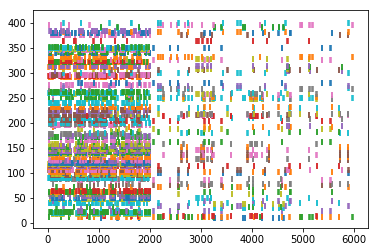

In [2]:
spike_trains = []
ass = mdf1.analogsignals[0]   
tstop = mdf1.t_stop
vm_spiking = []
for spiketrain in mdf1.spiketrains:
    vm_spiking.append(mdf1.analogsignals[0][spiketrain.annotations['source_id']])
    y = np.ones_like(spiketrain) * spiketrain.annotations['source_id']    
    # argument edges is the time interval you want to be considered.
    pspikes = pyspike.SpikeTrain(spiketrain,edges=(0,tstop))

    spike_trains.append(pspikes)

# plot the spike times
for (i, spike_train) in enumerate(spike_trains):
    plt.scatter(spike_train, i*np.ones_like(spike_train), marker='|')

# profile of the first two spike trains
f = spk.isi_profile(spike_trains, indices=[0, 1])
x, y = f.get_plottable_data()



In [3]:
print('plot the analog signal Block/Segment to get information about its length and sampling rate')
print(mdf1.analogsignals)
ass = mdf1.analogsignals[0][143]    
from neuronunit.models import static_model
print(type(ass))
sm = static_model.StaticModel(ass)
'''

sf = 10 * 1/0.001
dt = float(1.0/sf)
times = np.linspace(0.0,2.0001,4000)

plt.figure()
plt.plot(times, ass)
plt.show()
'''

plot the analog signal Block/Segment to get information about its length and sampling rate
[<AnalogSignal(array([[-59.111014  , -50.52556666, -52.018056  , ..., -59.8072147 ,
        -50.03386217, -54.95156728],
       [-59.11543682, -50.57270314, -52.05776716, ..., -59.80817383,
        -50.08344494, -54.97668387],
       [-59.11983763, -50.61960511, -52.09728076, ..., -59.80912819,
        -50.13278104, -55.00167549],
       ..., 
       [-60.        , -60.        , -60.        , ..., -60.        ,
        -60.        , -60.        ],
       [-60.        , -60.        , -60.        , ..., -60.        ,
        -60.        , -60.        ],
       [-60.        , -60.        , -60.        , ..., -60.        ,
        -60.        , -60.        ]]) * mV, [0.0 ms, 10000.1 ms], sampling rate: 10.0 1/ms)>]
<class 'quantities.quantity.Quantity'>


'\n\nsf = 10 * 1/0.001\ndt = float(1.0/sf)\ntimes = np.linspace(0.0,2.0001,4000)\n\nplt.figure()\nplt.plot(times, ass)\nplt.show()\n'

In [24]:




tstop = mdf1.t_stop

vm_spiking = []
spike_train_halves = []
auto_correlation = []
from elephant.spike_train_correlation import corrcoef
import quantities as qt
import copy
import neo
import elephant
cnt=0
#auto_correlation = []
cv_hist = [None for i in mdf1.spiketrains]

for spiketrain in mdf1.spiketrains:    
    print(cnt)
    first_ = list(copy.copy(spiketrain))
    second_ = list(copy.copy(spiketrain))

    first_ = neo.core.SpikeTrain(first_*qt.ms,t_stop=tstop)   
    second_ = neo.core.SpikeTrain(second_*qt.ms,t_stop=tstop)  
    y = np.ones_like(spiketrain) * spiketrain.annotations['source_id']

    print(elephant.statistics.cv2(mdf1.spiketrains))

    spike_trains.append(pspikes)
    print(spike_trains[-1])
print(elephant.statistics.fanofactor(mdf1.spiketrains))
#print(elephant.statistics.cv(mdf1.spiketrains))
        


0


AttributeError: module 'elephant.statistics' has no attribute 'cv2'

In [5]:

#ass = mdf1.analogsignals[0][0]    
#times = [i for i in range(0,len(vm_spiking[0]))]


plt.figure()
plt.plot(times[0:1000], vm_spiking[144][0:1000])
plt.show()
spiking_memb_pot0 = vm_spiking[20]
spiking_memb_pot1 = vm_spiking[21][0:1000]
spiking_memb_pot0 = vm_spiking[22]
spiking_memb_pot1 = vm_spiking[23]#[0:1000]
spiking_memb_pot1 = vm_spiking[43]

NameError: name 'times' is not defined

In [ ]:


#dt = 0.01 # 1 ms interval between points
T_max = len(vm_spiking[144]) # Signal lasts for 10 seconds
times = np.arange(0,T_max,dt)
N = len(times)
frequency = 20 # Frequency of sinusoid in Hz
offset = 0 # Phase offset in radians
lv_test_signal0 = np.array(0.6*np.sin(2*np.pi*frequency*times+offset))
lv_test_signal1 = np.array(0.6*np.sin(2*np.pi*2*frequency*times+offset))

composite_signal = [ float(vm) + lv_test_signal0[i] for i,vm in enumerate(vm_spiking[144])]


In [ ]:
plt.figure()
plt.plot(x, np.abs(y), '--k', label="ISI-profile")
print("ISI-distance: %.8f" % f.avrg())
f = spk.spike_profile(spike_trains, indices=[0, 1])
x, y = f.get_plottable_data()
plt.plot(x, y, '-b', label="SPIKE-profile")
print("SPIKE-distance: %.8f" % f.avrg())
plt.legend(loc="upper left")
plt.show()

In [ ]:
plt.figure()

f = spk.spike_sync_profile(spike_trains[0], spike_trains[1])
x, y = f.get_plottable_data()
plt.plot(x, y, '--ok', label="SPIKE-SYNC profile")
#print(f.x)
#print(f.y)
#print(f.mp)

print("Average:", f.avrg())


f = spk.spike_profile(spike_trains[0], spike_trains[1])
x, y = f.get_plottable_data()

plt.plot(x, y, '-b', label="SPIKE-profile")

plt.axis([0, 4000, -0.1, 1.1])
plt.legend(loc="center right")

plt.figure()

plt.subplot(211)

f = spk.spike_sync_profile(spike_trains)
x, y = f.get_plottable_data()
plt.plot(x, y, '-b', alpha=0.7, label="SPIKE-Sync profile")

x1, y1 = f.get_plottable_data(averaging_window_size=50)
plt.plot(x1, y1, '-k', lw=2.5, label="averaged SPIKE-Sync profile")

plt.subplot(212)

f_psth = spk.psth(spike_trains, bin_size=50.0)
x, y = f_psth.get_plottable_data()
plt.plot(x, y, '-k', alpha=1.0, label="PSTH")


print("Average:", f.avrg())

plt.show()

In [ ]:

#print(spike_trains)
plt.figure()
isi_distance = spk.isi_distance_matrix(spike_trains)
plt.imshow(isi_distance, interpolation='none')
plt.title("ISI-distance")
plt.show()

In [ ]:


plt.figure()
spike_distance = spk.spike_distance_matrix(spike_trains, interval=(0, float(tstop)))
plt.imshow(spike_distance, interpolation='none')
plt.title("SPIKE-distance, T=0-1000")
plt.show()

In [ ]:

plt.figure()
spike_sync = spk.spike_sync_matrix(spike_trains, interval=(0, float(tstop)))
plt.imshow(spike_sync, interpolation='none')
plt.title("SPIKE-Sync, T=2000-4000")
plt.show()

In [ ]:
import pickle
with open('bool_matrix.p','rb') as f:
   m = pickle.load(f)
print(type(m))
print(m)

#plt.figure()
#plt.imshow(spike_sync, interpolation='none')
sns.clustermap(m);

#plt.title("SPIKE-Sync, T=2000-4000")
plt.show()


plt.figure()
plt.clf()
plt.imshow(m, interpolation='none')
plt.title("connection matrix")
plt.show()